In [26]:
import pandas as pd
import numpy as np
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from scipy.stats import skewnorm 
from scipy.stats import binom   # for binomial distribution
from scipy.stats import t       # for t-test distribution 
from scipy.stats import ttest_ind # For Hypothesis testing 
import matplotlib.pyplot as plt   # for hypothesis testing 
from sklearn.linear_model import LinearRegression  # for predective analysis
from sklearn.model_selection import train_test_split # for predective analysis

In [17]:
df = pd.read_csv('C:/Users/Nisarg Patel/OneDrive/Desktop/Data_Analytics/Data_Analytics.csv', encoding='latin1')

In [10]:
df.head()

,Order ID,Order Date,Customer Name,Salesman,City,State,Country,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Cost,Sales,Profit,Quantity,Year,Month
0,1,01-01-2017,Ruby Patel,Erik Andersson,Stockholm,Stockholm,Sweden,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",9,45,36,3,2017,Jan
1,2,03-01-2017,Summer Hayward,Tom Alter,Southport,England,United Kingdom,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",255,854,599,7,2017,Jan
2,3,04-01-2017,Devin Huddleston,Camille Dubois,Valence,Auvergne-Rhône-Alpes,France,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",48,140,92,3,2017,Jan
3,4,04-01-2017,Mary Parker,Tom Alter,Birmingham,England,United Kingdom,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",9,27,18,2,2017,Jan
4,5,05-01-2017,Daniel Burke,Camille Dubois,Echirolles,Auvergne-Rhône-Alpes,France,Central,Home Office,Priority,Office Supplies,Art,"Binney & Smith Pencil Sharpener, Water Color",40,90,50,3,2017,Jan


In [19]:
df

,Order ID,Order Date,Customer Name,Salesman,City,State,Country,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Cost,Sales,Profit,Quantity,Year,Month
0,1,01-01-2017,Ruby Patel,Erik Andersson,Stockholm,Stockholm,Sweden,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",9,45,36,3,2017,Jan
1,2,03-01-2017,Summer Hayward,Tom Alter,Southport,England,United Kingdom,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",255,854,599,7,2017,Jan
2,3,04-01-2017,Devin Huddleston,Camille Dubois,Valence,Auvergne-Rhône-Alpes,France,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",48,140,92,3,2017,Jan
3,4,04-01-2017,Mary Parker,Tom Alter,Birmingham,England,United Kingdom,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",9,27,18,2,2017,Jan
4,5,05-01-2017,Daniel Burke,Camille Dubois,Echirolles,Auvergne-Rhône-Alpes,France,Central,Home Office,Priority,Office Supplies,Art,"Binney & Smith Pencil Sharpener, Water Color",40,90,50,3,2017,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4110,4111,31-12-2020,Eloise Sykes,Klaus Fischer,Bielefeld,North Rhine-Westphalia,Germany,Central,Consumer,Economy,Office Supplies,Supplies,"Kleencut Shears, Serrated",109,261,152,6,2020,Dec
4111,4112,31-12-2020,Jose Gambino,Tom Alter,Maidenhead,England,United Kingdom,North,Corporate,Economy,Furniture,Bookcases,"Ikea Stackable Bookrack, Traditional",126,245,119,2,2020,Dec
4112,4113,31-12-2020,Leon Barnes,Tom Alter,Worcester,England,United Kingdom,North,Consumer,Priority,Office Supplies,Storage,"Fellowes Shelving, Single Width",188,289,101,5,2020,Dec
4113,4114,31-12-2020,Rebecca Chamberlain,Wolfgang Schmidt,Hamburg,Hamburg,Germany,Central,Home Office,Economy,Office Supplies,Binders,"Wilson Jones Index Tab, Economy",24,32,8,5,2020,Dec


In [20]:
df.describe()

,Order ID,Cost,Sales,Profit,Quantity,Year
count,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000
mean,2058.000000,155.673633,308.034994,152.361361,3.747266,2018.726610
std,1188.042508,319.455633,511.485538,295.423113,2.174294,1.099502
min,1.000000,0.000000,3.000000,1.000000,1.000000,2017.000000
25%,1029.500000,18.000000,50.000000,19.000000,2.000000,2018.000000
50%,2058.000000,50.000000,120.000000,50.000000,3.000000,2019.000000
75%,3086.500000,144.000000,322.000000,146.000000,5.000000,2020.000000
max,4115.000000,4476.000000,6517.000000,3460.000000,14.000000,2020.000000


In [21]:
df.describe(include=['object'])

,Order Date,Customer Name,Salesman,City,State,Country,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Month
count,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115
unique,1213,792,26,999,127,15,3,3,4,3,17,1466,12
top,16-09-2020,Jose Gambino,Tom Alter,London,England,France,Central,Consumer,Economy,Office Supplies,Art,"Sanford Pencil Sharpener, Water Color",Aug
freq,13,13,623,113,623,991,2233,2132,2443,2595,747,16,561


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order ID       4115 non-null   int64 
 1   Order Date     4115 non-null   object
 2   Customer Name  4115 non-null   object
 3   Salesman       4115 non-null   object
 4   City           4115 non-null   object
 5   State          4115 non-null   object
 6   Country        4115 non-null   object
 7   Region         4115 non-null   object
 8   Segment        4115 non-null   object
 9   Ship Mode      4115 non-null   object
 10  Category       4115 non-null   object
 11  Sub-Category   4115 non-null   object
 12  Product Name   4115 non-null   object
 13  Cost           4115 non-null   int64 
 14  Sales          4115 non-null   int64 
 15  Profit         4115 non-null   int64 
 16  Quantity       4115 non-null   int64 
 17  Year           4115 non-null   int64 
 18  Month          4115 non-null

In [24]:
df.isnull()

,Order ID,Order Date,Customer Name,Salesman,City,State,Country,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Cost,Sales,Profit,Quantity,Year,Month
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4110,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4111,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4112,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4113,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
df.isnull().sum()

Order ID         0
Order Date       0
Customer Name    0
Salesman         0
City             0
State            0
Country          0
Region           0
Segment          0
Ship Mode        0
Category         0
Sub-Category     0
Product Name     0
Cost             0
Sales            0
Profit           0
Quantity         0
Year             0
Month            0
dtype: int64

In [30]:
# values_counts(), applies on pandas series, so use single bracket.
df['Category'].value_counts()

Office Supplies    2595
Furniture          1076
Technology          444
Name: Category, dtype: int64

In [31]:
# To convert into data frame
df['Category'].value_counts().to_frame()

,Category
Office Supplies,2595
Furniture,1076
Technology,444


In [33]:
# Change the name 
Category_Counts = df ['Category'].value_counts().to_frame()
Category_Counts.rename(columns = {'Category' : "category"}, inplace =True)
Category_Counts

,category
Office Supplies,2595
Furniture,1076
Technology,444


In [41]:
# To give coloumn name 
Category_Counts.index.name = 'category'
Category_Counts

,category
category,
Office Supplies,2595
Furniture,1076
Technology,444


In [42]:
df.mean()

C:\Users\Nisarg Patel\AppData\Local\Temp\ipykernel_20012\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Order ID    2058.000000
Cost         155.673633
Sales        308.034994
Profit       152.361361
Quantity       3.747266
Year        2018.726610
dtype: float64

In [49]:
df.median()

C:\Users\Nisarg Patel\AppData\Local\Temp\ipykernel_20012\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Order ID    2058.0
Cost          50.0
Sales        120.0
Profit        50.0
Quantity       3.0
Year        2019.0
dtype: float64

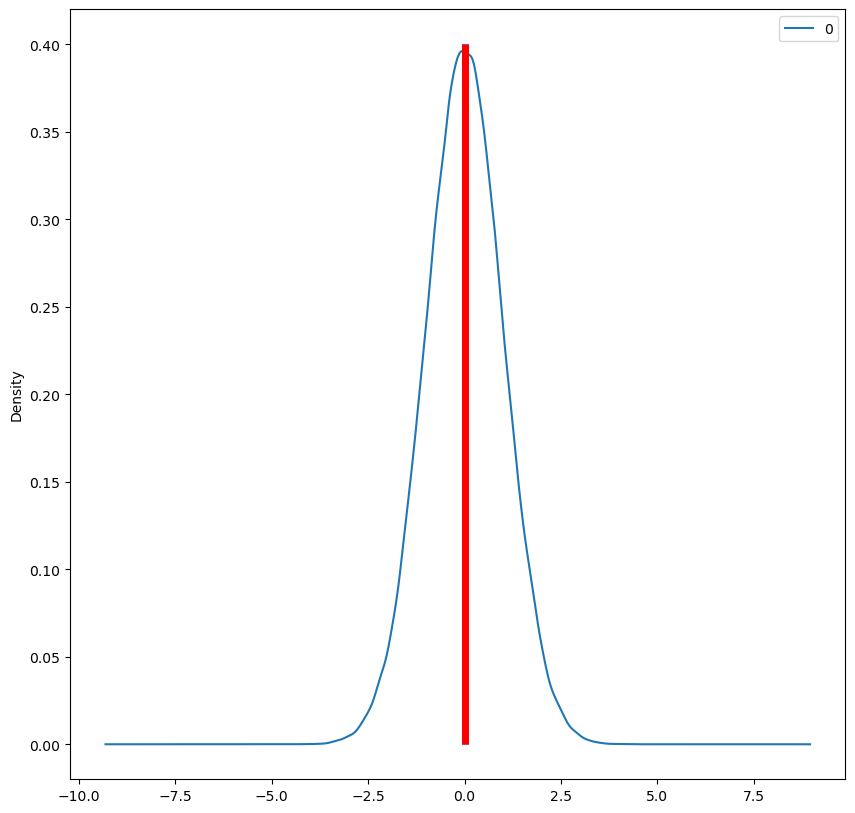

In [7]:

# Generate random normal data
norm_data = pd.DataFrame(np.random.normal(size=100000))

# Plot density
norm_data.plot(kind="density", figsize=(10, 10))

# Add vertical lines for mean and median
plt.vlines(norm_data.mean(), ymin=0, ymax=0.4, linewidth=5.0, color='blue')
plt.vlines(norm_data.median(), ymin=0, ymax=0.4, linewidth=5.0, color='red')

# Show the plot
plt.show()

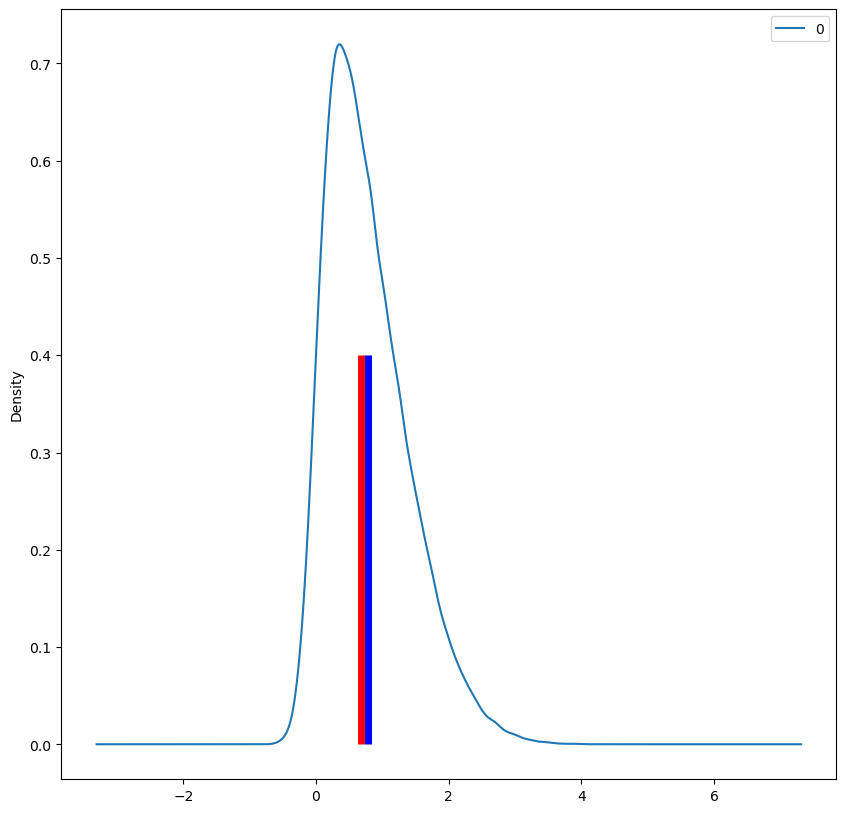

In [11]:
# Generate skewed data
a = 5  # Skewness parameter
skewed_data = skewnorm.rvs(a, size=100000)
skewed_df = pd.DataFrame(skewed_data)

# Plot density
skewed_df.plot(kind="density", figsize=(10, 10))

# Add vertical lines for mean and median
plt.vlines(skewed_df.mean(), ymin=0, ymax=0.4, linewidth=5.0, color='blue')
plt.vlines(skewed_df.median(), ymin=0, ymax=0.4, linewidth=5.0, color='red')

# Show the plot
plt.show()

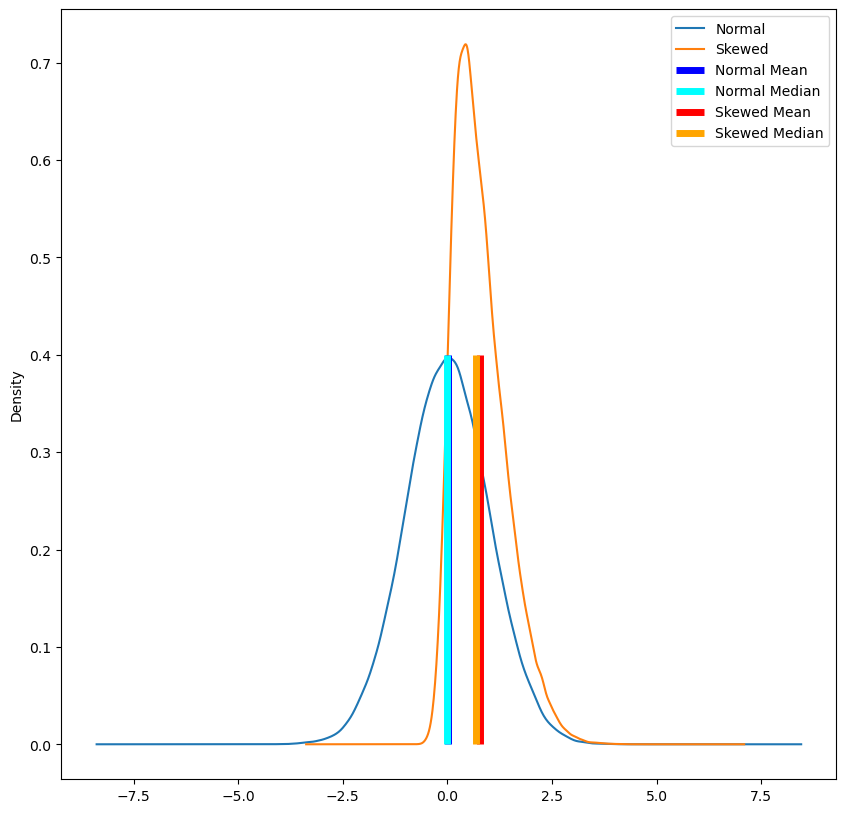

In [12]:
# Generate normal data
norm_data = np.random.normal(size=100000)
norm_df = pd.DataFrame(norm_data, columns=['Normal'])

# Generate skewed data
a = 5  # Skewness parameter
skewed_data = skewnorm.rvs(a, size=100000)
skewed_df = pd.DataFrame(skewed_data, columns=['Skewed'])

# Combine both dataframes
combined_df = pd.concat([norm_df, skewed_df], axis=1)

# Plot density for both datasets
plt.figure(figsize=(10, 10))
combined_df.plot(kind="density", ax=plt.gca())

# Add vertical lines for means and medians
plt.vlines(norm_df.mean(), ymin=0, ymax=0.4, linewidth=5.0, color='blue', label='Normal Mean')
plt.vlines(norm_df.median(), ymin=0, ymax=0.4, linewidth=5.0, color='cyan', label='Normal Median')
plt.vlines(skewed_df.mean(), ymin=0, ymax=0.4, linewidth=5.0, color='red', label='Skewed Mean')
plt.vlines(skewed_df.median(), ymin=0, ymax=0.4, linewidth=5.0, color='orange', label='Skewed Median')

# Add legend
plt.legend()

# Show the plot
plt.show()


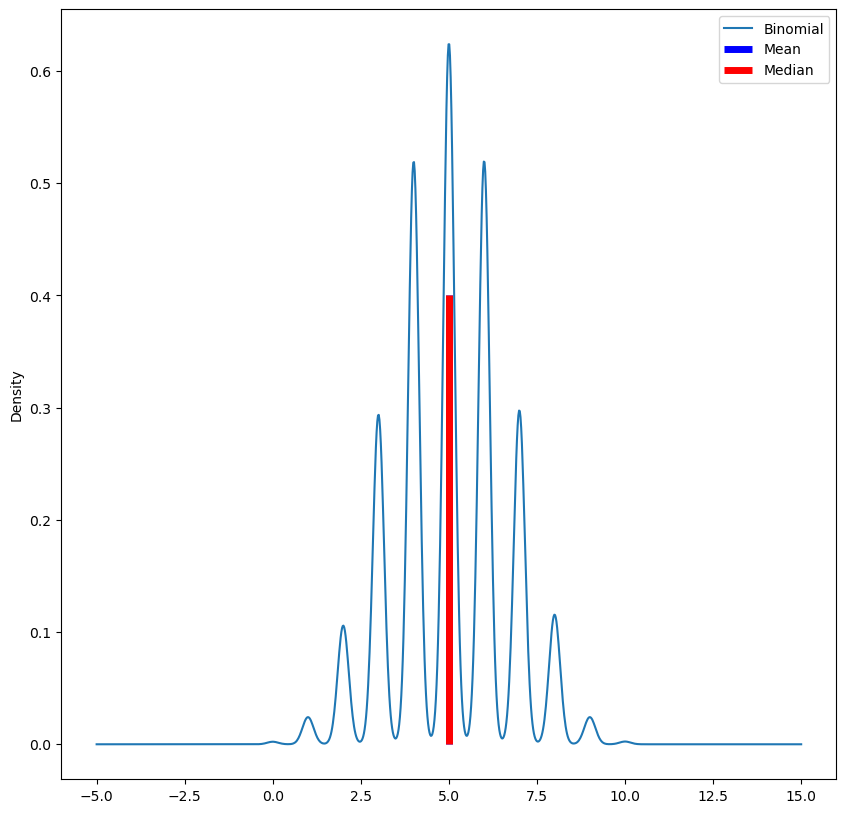

In [18]:
# Parameters for the binomial distribution
n = 10  # Number of trials
p = 0.5  # Probability of success

# Generate binomial data
binom_data = binom.rvs(n, p, size=100000)
binom_df = pd.DataFrame(binom_data, columns=['Binomial'])

# Plot density
plt.figure(figsize=(10, 10))
binom_df.plot(kind="density", ax=plt.gca())

# Add vertical lines for mean and median
plt.vlines(binom_df.mean(), ymin=0, ymax=0.4, linewidth=5.0, color='blue', label='Mean')
plt.vlines(binom_df.median(), ymin=0, ymax=0.4, linewidth=5.0, color='red', label='Median')

# Add legend
plt.legend()

# Show the plot
plt.show()

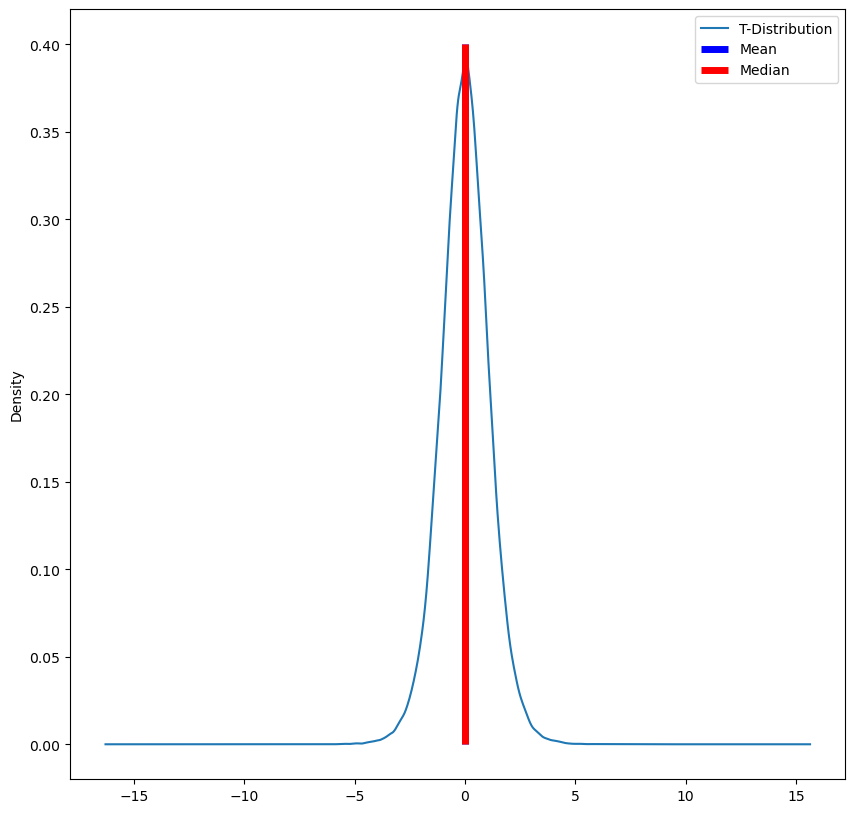

In [20]:
# Parameters for the t-distribution
df = 10  # Degrees of freedom

# Generate t-distribution data
t_data = t.rvs(df, size=100000)
t_df = pd.DataFrame(t_data, columns=['T-Distribution'])

# Plot density
plt.figure(figsize=(10, 10))
t_df.plot(kind="density", ax=plt.gca())

# Add vertical lines for mean and median
plt.vlines(t_df.mean(), ymin=0, ymax=0.4, linewidth=5.0, color='blue', label='Mean')
plt.vlines(t_df.median(), ymin=0, ymax=0.4, linewidth=5.0, color='red', label='Median')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Dignostics analysis

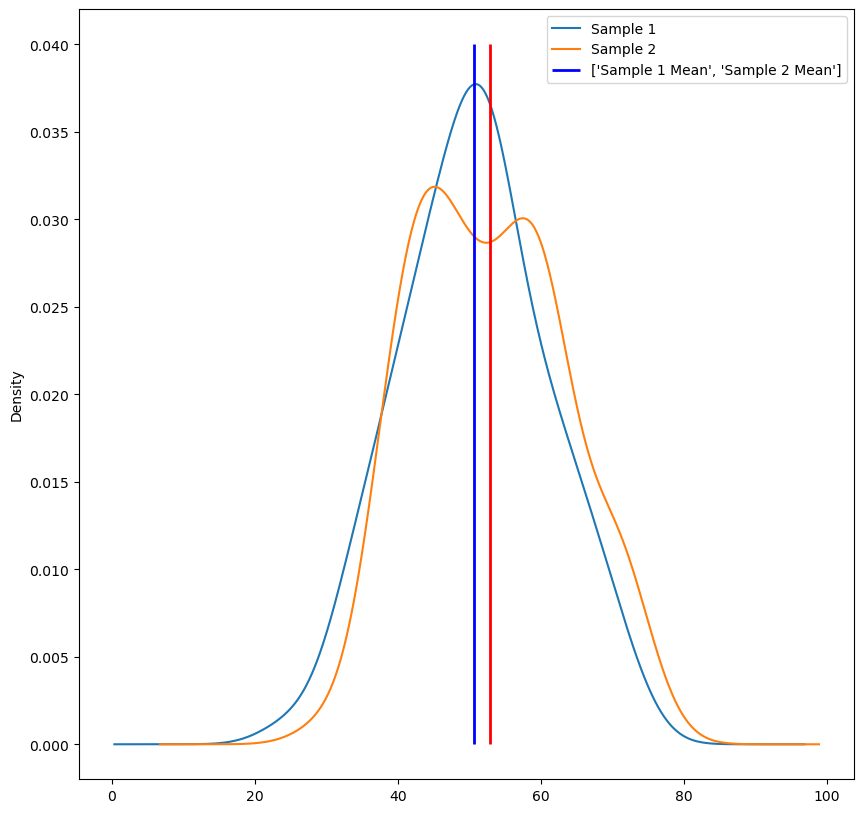

T-statistic: -1.53065199419143
P-value: 0.1274515248798546
We fail to reject the null hypothesis: There is no significant difference between the means of the two samples.


In [22]:
# Generate sample data
np.random.seed(0)  # For reproducibility
sample1 = np.random.normal(loc=50, scale=10, size=100)  # Sample 1 with mean=50 and std=10
sample2 = np.random.normal(loc=52, scale=10, size=100)  # Sample 2 with mean=52 and std=10

# Create a DataFrame
data = pd.DataFrame({'Sample 1': sample1, 'Sample 2': sample2})

# Plot the distributions of the two samples
plt.figure(figsize=(10, 10))
data.plot(kind="density", ax=plt.gca())

# Add vertical lines for means of both samples
plt.vlines(data.mean(), ymin=0, ymax=0.04, linewidth=2.0, color=['blue', 'red'], label=['Sample 1 Mean', 'Sample 2 Mean'])

# Add legend
plt.legend()

# Show the plot
plt.show()

# Perform t-test
t_stat, p_value = ttest_ind(sample1, sample2)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Hypothesis Testing
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis: There is a significant difference between the means of the two samples.")
else:
    print("We fail to reject the null hypothesis: There is no significant difference between the means of the two samples.")

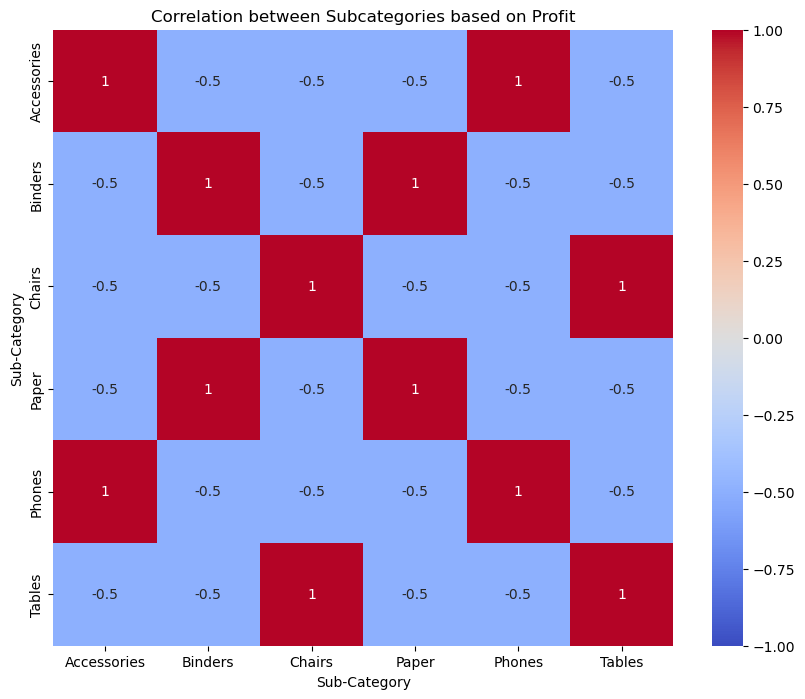

In [23]:
# Sample data
data = {
    'Category': ['Furniture', 'Furniture', 'Furniture', 'Office Supplies', 'Office Supplies', 'Technology', 'Technology', 'Technology'],
    'Sub-Category': ['Chairs', 'Tables', 'Tables', 'Binders', 'Paper', 'Phones', 'Accessories', 'Accessories'],
    'Profit': [500, 1500, 1200, 300, 200, 800, 600, 700]
}

df = pd.DataFrame(data)

# Pivot the data to get category and subcategory wise profits
pivot_df = df.pivot_table(index='Category', columns='Sub-Category', values='Profit', aggfunc='sum', fill_value=0)

# Calculate the correlation matrix
corr_matrix = pivot_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Subcategories based on Profit')
plt.show()

# Predective analytics 

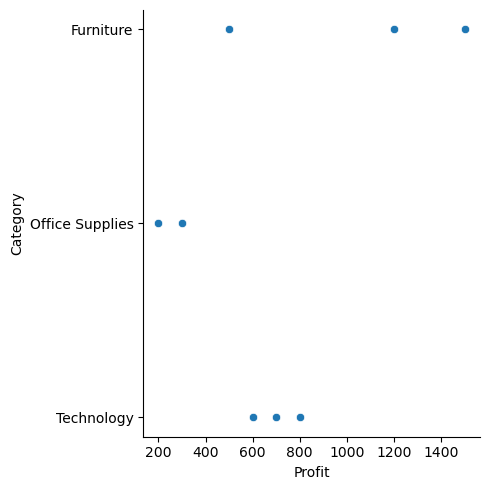

In [24]:
sns.relplot(x="Profit", y="Category", data= data)

In [32]:
# model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Category      8 non-null      object
 1   Sub-Category  8 non-null      object
 2   Profit        8 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 324.0+ bytes


In [33]:
avg_profit = df["Profit"].astype('int').mean(axis=0)
print("Average of Profit:", avg_profit)

Average of Profit: 725.0


Text(0.5, 1.0, 'Category Wise Profit')

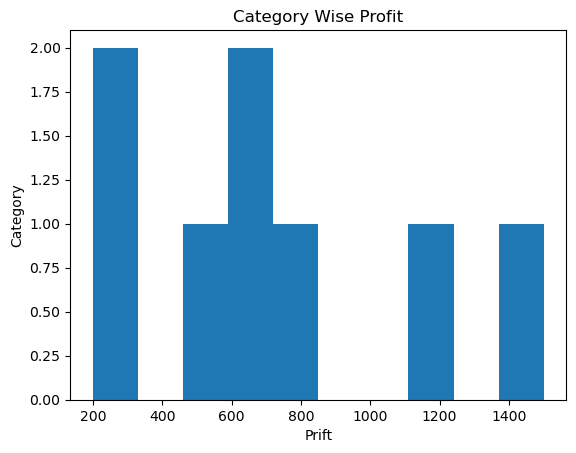

In [36]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Profit"])

# set x/y labels and plot title
plt.pyplot.xlabel("Prift")
plt.pyplot.ylabel("Category")
plt.pyplot.title("Category Wise Profit")


In [37]:
bins = np.linspace(min(df["Profit"]), max(df["Profit"]), 4)
bins

array([ 200.        ,  633.33333333, 1066.66666667, 1500.        ])

In [38]:
group_names = ['Low', 'Medium', 'High']

In [39]:
df['Profit-binned'] = pd.cut(df['Profit'], bins, labels=group_names,include_lowest = True)
df[['Profit','Profit-binned']].head(20)

,Profit,Profit-binned
0,500,Low
1,1500,High
2,1200,High
3,300,Low
4,200,Low
5,800,Medium
6,600,Low
7,700,Medium


In [40]:
df["Profit-binned"].value_counts()

Low       4
Medium    2
High      2
Name: Profit-binned, dtype: int64

Text(0.5, 1.0, 'Profit bins')

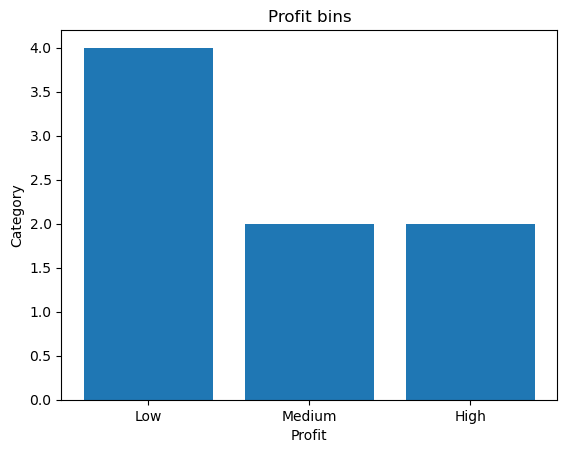

In [41]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["Profit-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Profit")
plt.pyplot.ylabel("Category")
plt.pyplot.title("Profit bins")

AttributeError: module 'matplotlib' has no attribute 'show'

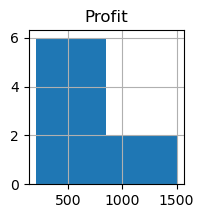

In [45]:
#histogram
df.hist(bins=2,figsize=(2,2))
plt.show()

AttributeError: module 'matplotlib' has no attribute 'show'

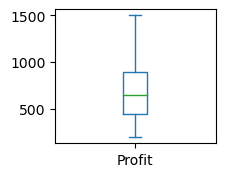

In [43]:
df.plot(kind='box', figsize=(12, 8), subplots=True, layout=(4,5))
plt.show()

AttributeError: module 'matplotlib' has no attribute 'subplots_adjust'

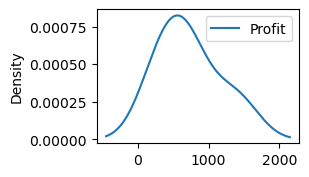

In [46]:
df.plot( kind='density', figsize=(12,8), subplots=True, layout=(4,4),sharex=False)
plt.subplots_adjust(wspace=0.5,hspace=0.3)
plt.show()

In [52]:
#Check class distribution
num_obs = len(df)
num_true = len(df.loc[df['Profit'] == 1])
num_false = len(df.loc[df['Profit'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

Number of True cases:  0 (0.00%)
Number of False cases: 0 (0.00%)


In [54]:
df = pd.read_csv('C:/Users/Nisarg Patel/OneDrive/Desktop/Data_Analytics/Data_Analytics.csv', encoding='latin1')

In [55]:
df

,Order ID,Order Date,Customer Name,Salesman,City,State,Country,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Cost,Sales,Profit,Quantity,Year,Month
0,1,01-01-2017,Ruby Patel,Erik Andersson,Stockholm,Stockholm,Sweden,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",9,45,36,3,2017,Jan
1,2,03-01-2017,Summer Hayward,Tom Alter,Southport,England,United Kingdom,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",255,854,599,7,2017,Jan
2,3,04-01-2017,Devin Huddleston,Camille Dubois,Valence,Auvergne-Rhône-Alpes,France,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",48,140,92,3,2017,Jan
3,4,04-01-2017,Mary Parker,Tom Alter,Birmingham,England,United Kingdom,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",9,27,18,2,2017,Jan
4,5,05-01-2017,Daniel Burke,Camille Dubois,Echirolles,Auvergne-Rhône-Alpes,France,Central,Home Office,Priority,Office Supplies,Art,"Binney & Smith Pencil Sharpener, Water Color",40,90,50,3,2017,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4110,4111,31-12-2020,Eloise Sykes,Klaus Fischer,Bielefeld,North Rhine-Westphalia,Germany,Central,Consumer,Economy,Office Supplies,Supplies,"Kleencut Shears, Serrated",109,261,152,6,2020,Dec
4111,4112,31-12-2020,Jose Gambino,Tom Alter,Maidenhead,England,United Kingdom,North,Corporate,Economy,Furniture,Bookcases,"Ikea Stackable Bookrack, Traditional",126,245,119,2,2020,Dec
4112,4113,31-12-2020,Leon Barnes,Tom Alter,Worcester,England,United Kingdom,North,Consumer,Priority,Office Supplies,Storage,"Fellowes Shelving, Single Width",188,289,101,5,2020,Dec
4113,4114,31-12-2020,Rebecca Chamberlain,Wolfgang Schmidt,Hamburg,Hamburg,Germany,Central,Home Office,Economy,Office Supplies,Binders,"Wilson Jones Index Tab, Economy",24,32,8,5,2020,Dec


In [56]:
feature_col_names = ['Customer Name', 'Salesman', 'City', 'Country', 'Region', 'Shipment', 'Category', 'Product Name', 'Cost', 'Slaes', 'Profit', 'Quantity']
predicted_class_names = ['Profit']

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Sample data
data = {
    'Category': ['Furniture', 'Furniture', 'Furniture', 'Office Supplies', 'Office Supplies', 'Technology', 'Technology', 'Technology'],
    'Sub-Category': ['Chairs', 'Tables', 'Tables', 'Binders', 'Paper', 'Phones', 'Accessories', 'Accessories'],
    'Profit': [500, 1500, 1200, 300, 200, 800, 600, 700]
}

df = pd.DataFrame(data)

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Category', 'Sub-Category'])

# Define predictor features and target variable
feature_col_names = df_encoded.columns.difference(['Profit'])
X = df_encoded[feature_col_names].values  # predictor feature columns
y = df_encoded['Profit'].values  # predicted class column

# Split the dataset
split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

# Display the shapes of the train/test splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (5, 9)
X_test shape: (3, 9)
y_train shape: (5,)
y_test shape: (3,)


In [60]:
#We check to ensure we have the the desired 70% train, 30% test split of the data
trainval = (1.0 * len(X_train)) / (1.0 * len(df.index))
testval = (1.0 * len(X_test)) / (1.0 * len(df.index))
print("{0:0.2f}% in training set".format(trainval * 100))
print("{0:0.2f}% in test set".format(testval * 100))

62.50% in training set
37.50% in test set


In [63]:
#Verifying predicted value was split correctly
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['Profit'] == 1]), (len(df.loc[df['Profit'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Profit'] == 0]), (len(df.loc[df['Profit'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 0 (0.00%)
Original False : 0 (0.00%)

Training True  : 0 (0.00%)
Training False : 0 (0.00%)

Test True      : 0 (0.00%)
Test False     : 0 (0.00%)


In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# Sample data
data = {
    'Category': ['Furniture', 'Furniture', 'Furniture', 'Office Supplies', 'Office Supplies', 'Technology', 'Technology', 'Technology'],
    'Sub-Category': ['Chairs', 'Tables', 'Tables', 'Binders', 'Paper', 'Phones', 'Accessories', 'Accessories'],
    'Profit': [500, 1500, 1200, 300, 200, 800, 600, 700]
}

df = pd.DataFrame(data)

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Category', 'Sub-Category'])

# Define predictor features and target variable
feature_col_names = df_encoded.columns.difference(['Profit'])
X = df_encoded[feature_col_names].values  # predictor feature columns
y = df_encoded['Profit'].values  # predicted class column

# Split the dataset
split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

# Create Decision Tree Regressor model object and train it with the data
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# This returns array of predicted results from training set
dt_predict_train = dt_model.predict(X_train)
# Get accuracy (R^2 score)
accuracy_train = dt_model.score(X_train, y_train) * 100
# Print accuracy
print("Accuracy of our DT training model (R^2 score) is : {0:.4f}".format(accuracy_train))

# This returns array of predicted results from testing set
dt_predict_test = dt_model.predict(X_test)
# Get accuracy (R^2 score)
accuracy_test = dt_model.score(X_test, y_test) * 100
# Print accuracy
print("Accuracy of our DT testing model (R^2 score) is : {0:.4f}".format(accuracy_test))


Accuracy of our DT training model (R^2 score) is : 99.1935
Accuracy of our DT testing model (R^2 score) is : -14.3987


In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sample data
data = {
    'Category': ['Furniture', 'Furniture', 'Furniture', 'Office Supplies', 'Office Supplies', 'Technology', 'Technology', 'Technology'],
    'Sub-Category': ['Chairs', 'Tables', 'Tables', 'Binders', 'Paper', 'Phones', 'Accessories', 'Accessories'],
    'Profit': [500, 1500, 1200, 300, 200, 800, 600, 700]
}

df = pd.DataFrame(data)

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Category', 'Sub-Category'])

# Define predictor features and target variable
feature_col_names = df_encoded.columns.difference(['Profit'])
X = df_encoded[feature_col_names].values  # predictor feature columns
y = df_encoded['Profit'].values  # target variable column

# Split the dataset
split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

# Create Decision Tree Regressor model object and train it with the data
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict results for training and testing sets
dt_predict_train = dt_model.predict(X_train)
dt_predict_test = dt_model.predict(X_test)

# Evaluate the model
results = dict()

results['Training'] = {
    'Mean Absolute Error': mean_absolute_error(y_train, dt_predict_train),
    'Mean Squared Error': mean_squared_error(y_train, dt_predict_train),
    'R^2 Score': r2_score(y_train, dt_predict_train) * 100
}

results['Test'] = {
    'Mean Absolute Error': mean_absolute_error(y_test, dt_predict_test),
    'Mean Squared Error': mean_squared_error(y_test, dt_predict_test),
    'R^2 Score': r2_score(y_test, dt_predict_test) * 100
}

results_df = pd.DataFrame(results)
print(results_df)


                        Training           Test
Mean Absolute Error    20.000000     383.333333
Mean Squared Error   1000.000000  200833.333333
R^2 Score              99.193548     -14.398734


In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sample data
data = {
    'Category': ['Furniture', 'Furniture', 'Furniture', 'Office Supplies', 'Office Supplies', 'Technology', 'Technology', 'Technology'],
    'Sub-Category': ['Chairs', 'Tables', 'Tables', 'Binders', 'Paper', 'Phones', 'Accessories', 'Accessories'],
    'Profit': [500, 1500, 1200, 300, 200, 800, 600, 700]
}

df = pd.DataFrame(data)

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Category', 'Sub-Category'])

# Define predictor features and target variable
feature_col_names = df_encoded.columns.difference(['Profit'])
X = df_encoded[feature_col_names].values  # predictor feature columns
y = df_encoded['Profit'].values  # target variable column

# Split the dataset
split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

# Create Decision Tree Regressor model object and train it with the data
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict results for training and testing sets
dt_predict_train = dt_model.predict(X_train)
dt_predict_test = dt_model.predict(X_test)

# Evaluate the model
results = dict()

results['Training'] = {
    'Mean Absolute Error': mean_absolute_error(y_train, dt_predict_train),
    'Mean Squared Error': mean_squared_error(y_train, dt_predict_train),
    'R^2 Score': r2_score(y_train, dt_predict_train)
}

results['Test'] = {
    'Mean Absolute Error': mean_absolute_error(y_test, dt_predict_test),
    'Mean Squared Error': mean_squared_error(y_test, dt_predict_test),
    'R^2 Score': r2_score(y_test, dt_predict_test)
}

results_df = pd.DataFrame(results)
print(results_df)


                        Training           Test
Mean Absolute Error    20.000000     383.333333
Mean Squared Error   1000.000000  200833.333333
R^2 Score               0.991935      -0.143987


In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sample data
data = {
    'Category': ['Furniture', 'Furniture', 'Furniture', 'Office Supplies', 'Office Supplies', 'Technology', 'Technology', 'Technology'],
    'Sub-Category': ['Chairs', 'Tables', 'Tables', 'Binders', 'Paper', 'Phones', 'Accessories', 'Accessories'],
    'Profit': [500, 1500, 1200, 300, 200, 800, 600, 700]
}

df = pd.DataFrame(data)

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Category', 'Sub-Category'])

# Define predictor features and target variable
feature_col_names = df_encoded.columns.difference(['Profit'])
X = df_encoded[feature_col_names].values  # predictor feature columns
y = df_encoded['Profit'].values  # target variable column

# Split the dataset
split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

# Create Decision Tree Regressor model object and train it with the data
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict results for training and testing sets
dt_predict_train = dt_model.predict(X_train)
dt_predict_test = dt_model.predict(X_test)

# Evaluate the model
results = dict()

results['Training'] = {
    'Mean Absolute Error': mean_absolute_error(y_train, dt_predict_train),
    'Mean Squared Error': mean_squared_error(y_train, dt_predict_train),
    'R^2 Score': r2_score(y_train, dt_predict_train)
}

results['Test'] = {
    'Mean Absolute Error': mean_absolute_error(y_test, dt_predict_test),
    'Mean Squared Error': mean_squared_error(y_test, dt_predict_test),
    'R^2 Score': r2_score(y_test, dt_predict_test)
}

results_df = pd.DataFrame(results)
print(results_df)


                        Training           Test
Mean Absolute Error    20.000000     383.333333
Mean Squared Error   1000.000000  200833.333333
R^2 Score               0.991935      -0.143987
